# STAYZE RENT PREDICTOR

## Importing required libraries

In [1]:
# Basic libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
path = '../data/Train.csv'

In [3]:
data = pd.read_csv(path)

## Data information

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [5]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34221,28342248,Ridgewood retreat,120730056,Sophie,Queens,Ridgewood,40.70602,-73.90485,Entire home/apt,80,5,2,2018-09-30,0.21,1,0
34222,8438775,Private BR & Bath near Central Park,41042927,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,163,2019-06-28,3.55,1,32
34223,27332770,Warm Home w/ Private Garden (Inwood Manhattan ...,80381355,Mary,Manhattan,Inwood,40.86912,-73.92183,Entire home/apt,195,2,6,2019-03-31,0.53,1,0
34224,9063972,Chill Bushwick Suite,3040551,Olu Bliss,Brooklyn,Bushwick,40.69709,-73.91435,Private room,80,3,0,NaN,NaN,1,0
34225,13372860,Cozy and simple Bedstuy studio right by the train,16755566,Ashton,Brooklyn,Bedford-Stuyvesant,40.69076,-73.92886,Entire home/apt,69,4,5,2016-11-23,0.13,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
data.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Data Cleaning and EDA

## Checking if null names can be recovered from id or not ?

In [9]:
# checking for name if recovarable from id
missing_names = data[data['name'].isnull()]['id'].tolist()
non_missing_names = data[data['name'].notnull()]['id'].tolist()
print(pd.DataFrame(np.isin(non_missing_names,missing_names))[0].value_counts())
print(len(non_missing_names))
# no name can be recovered from id.

False    34214
Name: 0, dtype: int64
34214


## Filling missing names with 'Anonymous Place'

In [10]:
data.name.fillna('Anonymous Place',inplace = True)

## Checking to confirm the same host id has same host name

In [11]:
data['host_id'].value_counts()

219517861    229
107434423    155
30283594      89
16098958      73
61391963      69
            ... 
24031106       1
35031188       1
6004860        1
713764         1
16755566       1
Name: host_id, Length: 27449, dtype: int64

In [12]:
data[data['host_id'] == 30283594][:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
162,36309944,Lavish 1br apartment in New York's Upper East ...,30283594,Kara,Manhattan,Upper East Side,40.76288,-73.95828,Entire home/apt,269,30,0,NaN,NaN,121,333
805,12089013,NYC MIDTOWN WEST LUXURY 1BR APT! CITY VIEWS!,30283594,Kara,Manhattan,Midtown,40.76545,-73.98156,Entire home/apt,239,30,1,2019-02-28,0.23,121,351
815,8320129,Cozy Studio Apt Upper East Side Near Hospitals,30283594,Kara,Manhattan,Upper East Side,40.76137,-73.96042,Entire home/apt,199,30,3,2018-04-22,0.11,121,365
1404,9043722,Lavish 1BR in FiDi + city views,30283594,Kara,Manhattan,Financial District,40.70574,-74.00809,Entire home/apt,239,30,2,2018-06-10,0.09,121,186
1556,9881685,Upscale and spacious 2bed/2bath Midtown West apt.,30283594,Kara,Manhattan,Midtown,40.76665,-73.98281,Entire home/apt,190,30,1,2017-04-30,0.04,121,286


## Checking if null host_names can be recovered from host_id or not ?

In [13]:
# checking for host_name if recovarable from host_id
missing_host_names = data[data['host_name'].isnull()]['host_id'].tolist()
non_missing_host_names = data[data['host_name'].notnull()]['host_id'].tolist()
print(pd.DataFrame(np.isin(non_missing_host_names,missing_host_names))[0].value_counts())
print(len(non_missing_host_names))
# no name can be recovered from id.

False    34213
Name: 0, dtype: int64
34213


In [14]:
data[data['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
740,30468335,LARGE Prospect Lefferts Gardens Bedroom,228750026,NaN,Brooklyn,Flatbush,40.65152,-73.95271,Private room,55,7,0,NaN,NaN,1,69
2916,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
6635,11553543,Cozy Room Astoria,26138712,NaN,Queens,Ditmars Steinway,40.77587,-73.91775,Private room,45,1,5,2017-01-01,0.13,1,0
8762,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
9995,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
13269,12113879,"Sunny, Large West Village 1 BR Near Everything",5300585,NaN,Manhattan,Chelsea,40.73949,-73.99801,Entire home/apt,220,4,81,2019-07-02,2.11,1,217
16369,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0
18200,15648096,Spacious 2 bedroom close to Manhattan,100971588,NaN,Bronx,Highbridge,40.83844,-73.92489,Entire home/apt,75,4,37,2019-07-07,1.21,1,26
20097,21787094,Spacious and Bright Midtown East Apartment,415290,NaN,Manhattan,Upper East Side,40.76436,-73.96836,Entire home/apt,325,1,0,NaN,NaN,1,0
20221,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0


## Filling missing host_name with 'Anonymous Host'

In [15]:
data.host_name.fillna('Anonymous Host', inplace = True)

## Again check for null values

In [16]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
data[data['number_of_reviews'] == 0].shape

(6982, 16)

### OBSERVATION:
### It can be observed that wherever number of reviews are 0, in that rows value for last review and reviews per month is NA which can be replace by not applicable and 0 respectively 

In [18]:
data['last_review'].fillna('Not Applicable', inplace = True)

In [19]:
data['reviews_per_month'].fillna(0, inplace = True)

In [20]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Top 10 place names as per price

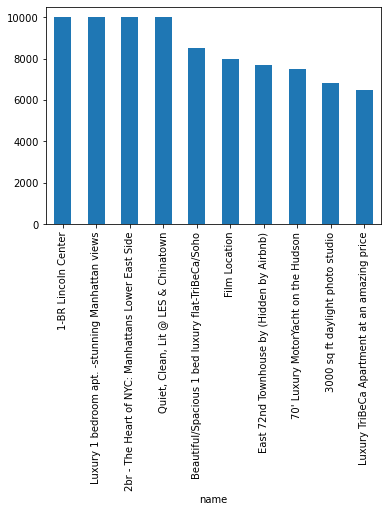

In [22]:
data.groupby('name')['price'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar' )
plt.show()

### Price as per room type analysis

In [23]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [24]:
data.room_type.value_counts()

Entire home/apt    17829
Private room       15594
Shared room          803
Name: room_type, dtype: int64

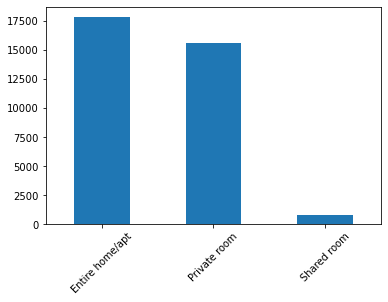

In [25]:
data.room_type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

## Make ID and host ID as string

In [26]:
data['id'] = data['id'].apply(lambda x : str(x))
data['host_id'] = data['host_id'].apply(lambda x : str(x))

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  object 
 1   name                            34226 non-null  object 
 2   host_id                         34226 non-null  object 
 3   host_name                       34226 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

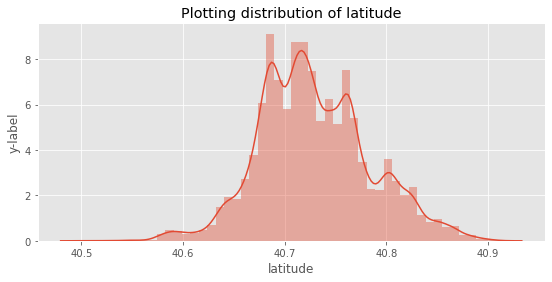

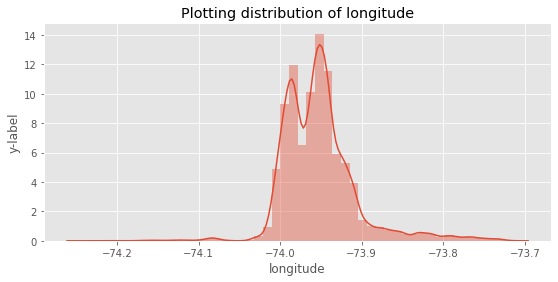

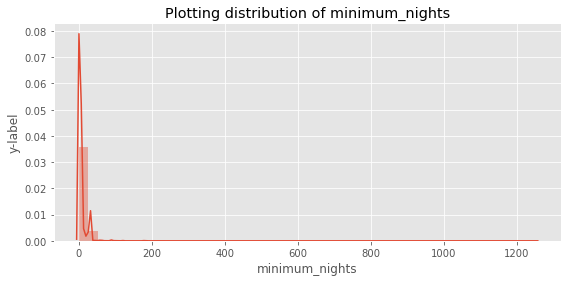

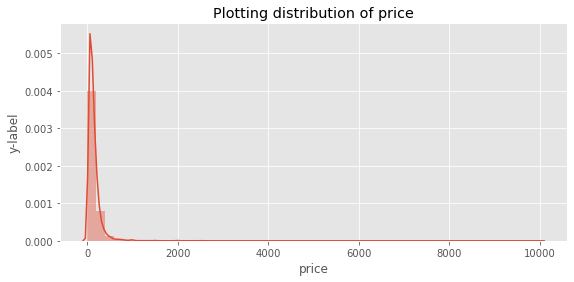

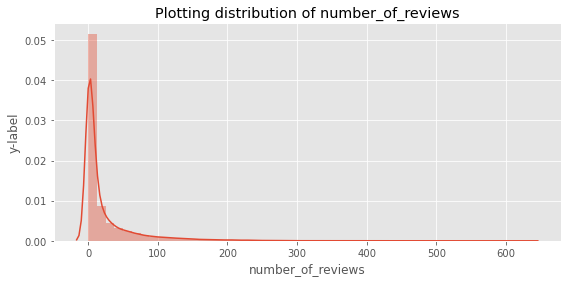

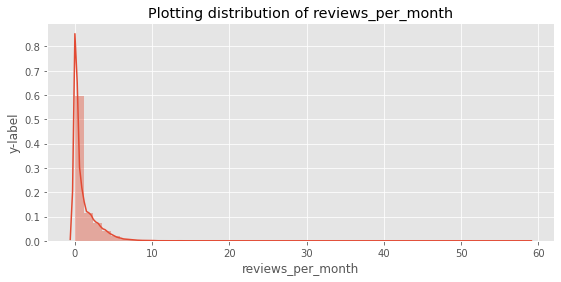

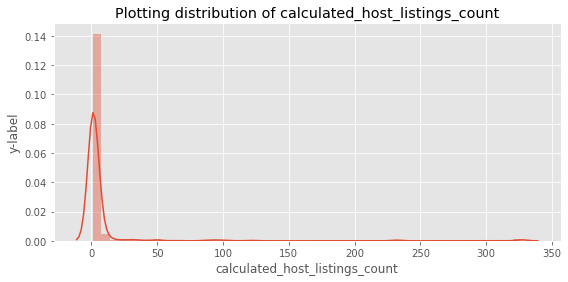

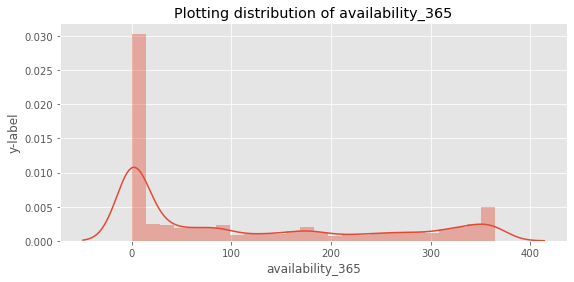

In [30]:
plt.style.use('ggplot')
numerical = ['latitude', 'longitude', 'minimum_nights', 'price','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for column in numerical:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column])
    plt.title('Plotting distribution of '+ column)
    plt.xlabel(column)
    plt.ylabel('y-label')

### Observation: It can be seen that the the columns 'minimum_nights', 'price','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' are rightly skewed

### List of skewed data

In [31]:
skewed_var = ['minimum_nights', 'price','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

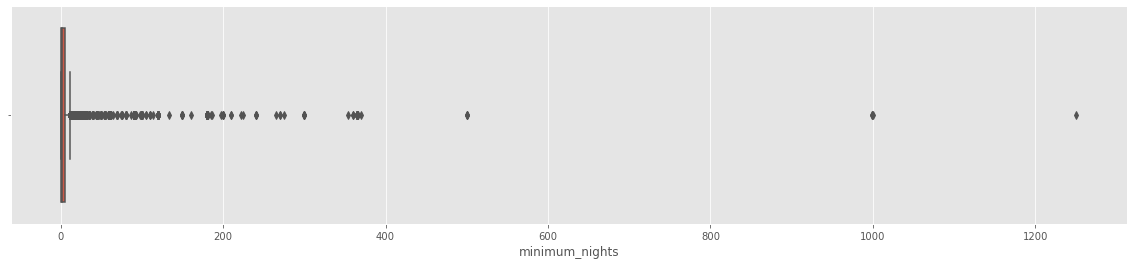

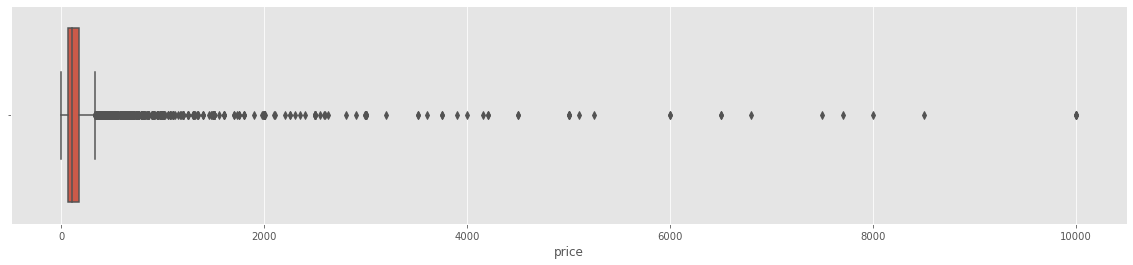

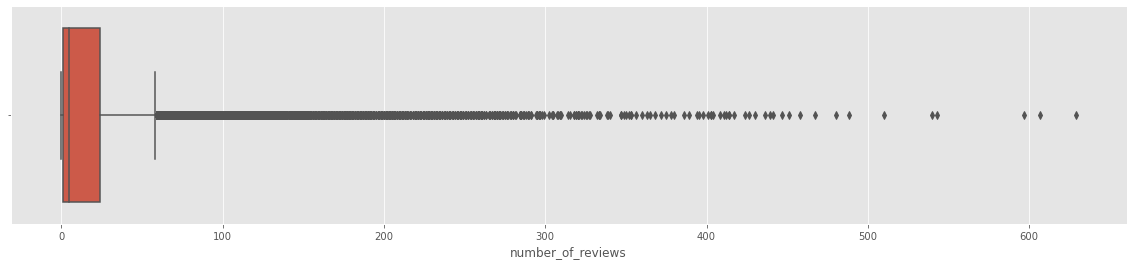

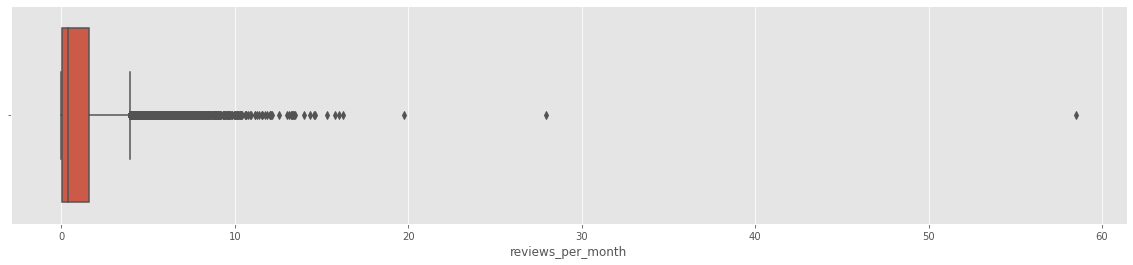

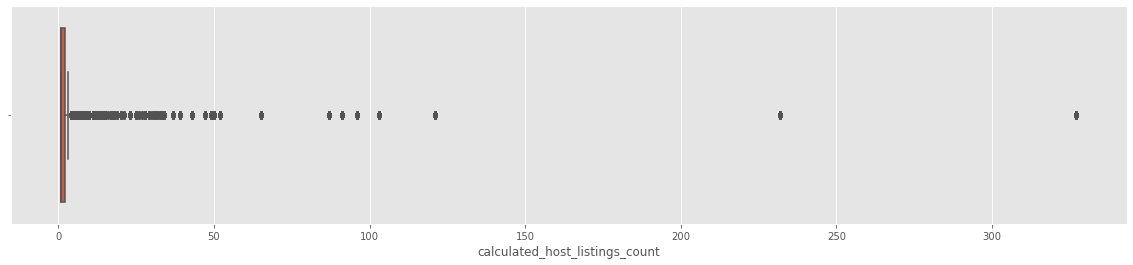

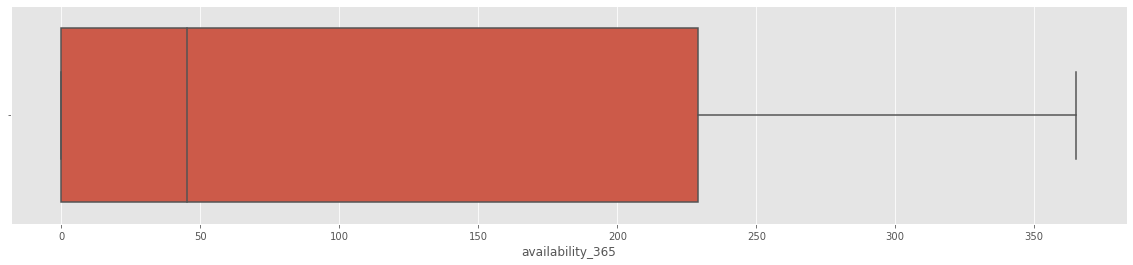

In [32]:
for i in skewed_var:
    plt.figure(figsize=(20,4))
    sns.boxplot(data = data, x = data[i])

### Treating the outlier with quantile method

In [33]:
# For minimum nights
Q1 = data['minimum_nights'].quantile(0.25)
Q3 = data['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['minimum_nights'] < Upper_side]

1.0
5.0
4.0
-5.0 11.0


In [34]:
# For price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['price'] < Upper_side]

69.0
175.0
106.0
-90.0 334.0


In [35]:
# For number of reviews
Q1 = data['number_of_reviews'].quantile(0.25)
Q3 = data['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['number_of_reviews'] < Upper_side]

1.0
29.0
28.0
-41.0 71.0


In [36]:
# For reviews per month
Q1 = data['reviews_per_month'].quantile(0.25)
Q3 = data['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['reviews_per_month'] < Upper_side]

0.05
1.28
1.23
-1.795 3.125


In [37]:
# For calculated host listing count
Q1 = data['calculated_host_listings_count'].quantile(0.25)
Q3 = data['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['calculated_host_listings_count'] < Upper_side]

1.0
2.0
1.0
-0.5 3.5


In [38]:
# For availability 365
Q1 = data['availability_365'].quantile(0.25)
Q3 = data['availability_365'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print(Q3)
print(IQR)

Lower_side = Q1 - 1.5*IQR
Upper_side = Q3 + 1.5*IQR

print(Lower_side, Upper_side)
data = data[data['availability_365'] < Upper_side]

0.0
96.75
96.75
-145.125 241.875


## Converting useful catagorical columns to numerical

In [39]:
working_data = data.copy()

In [40]:
working_data['room_type'] = working_data['room_type'].astype('category').cat.codes
working_data['neighbourhood_group'] = working_data['neighbourhood_group'].astype('category').cat.codes
working_data['neighbourhood'] = working_data['neighbourhood'].astype('category').cat.codes

### Drop id, name, host_id, host_name 

In [41]:
# working_data.drop(['id', 'name', 'host_id', 'host_name','last_review','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365', 'latitude', 'longitude'], axis = 1, inplace = True)
# working_data.drop(['id', 'name', 'host_id', 'host_name','last_review','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365', 'latitude', 'longitude'], axis = 1, inplace = True)
working_data.drop(['id', 'host_id', 'host_name'], axis = 1, inplace = True)

## Find correlations between variables

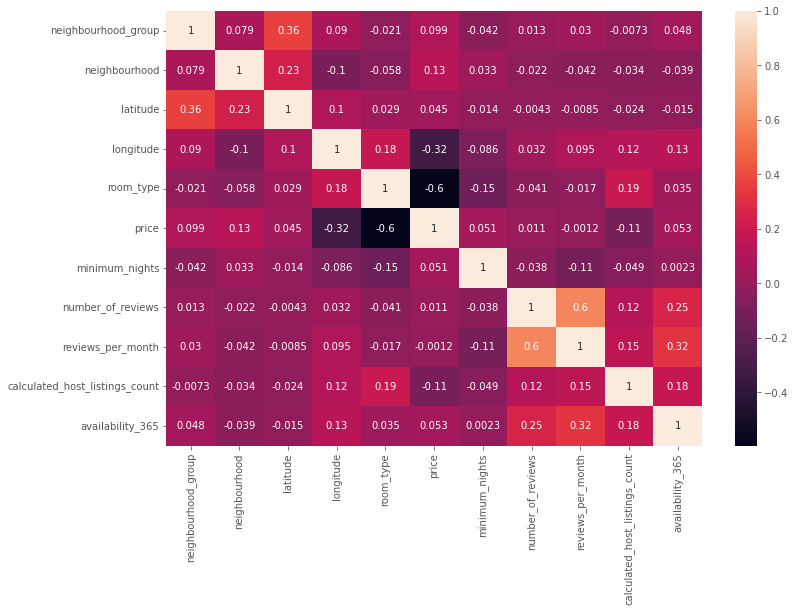

In [42]:
corr = working_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True)
plt.show()

In [43]:
num_var = working_data.select_dtypes(include = 'number')
num_var

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,137,40.72217,-73.99481,1,120,7,3,0.06,3,0
7,1,76,40.69064,-73.97898,0,200,5,0,0.00,1,0
12,2,89,40.81619,-73.93798,0,77,1,2,0.05,1,0
14,2,90,40.76159,-73.99824,1,69,2,22,0.64,2,7
17,1,202,40.71417,-73.94123,0,94,3,4,1.32,1,31
...,...,...,...,...,...,...,...,...,...,...,...
34218,2,190,40.79613,-73.96658,1,60,2,23,0.62,1,0
34221,3,157,40.70602,-73.90485,0,80,5,2,0.21,1,0
34223,2,97,40.86912,-73.92183,0,195,2,6,0.53,1,0
34224,1,26,40.69709,-73.91435,1,80,3,0,0.00,1,0


# Machine Learning part

In [44]:
from sklearn import metrics
# for training and splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Different models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

# For checking
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

## Training of Model

In [45]:
X = num_var.drop(['price'],1)
y = num_var["price"]

C:\Users\gmahi\AppData\Local\Temp/ipykernel_2408/900740288.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = num_var.drop(['price'],1)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 42)

## Create a linear regression model 

In [47]:
lr  = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Evaluate the above model using error metrics for linear regression

In [48]:
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", rmse_lr)
print("R2_score: ",r2_score(y_test,y_pred))
print("Mean Absolute Error:  ", mean_absolute_error(y_test,y_pred))

Root Mean Squared Error:  49.72915064876823
R2_score:  0.4311220942187761
Mean Absolute Error:   37.152917063336226


In [49]:
y_pred[0:10]

array([102.81012437, 166.68096163, 171.87896697,  96.25269652,
       198.19472233,  85.55884316, 149.79870357, 107.00160624,
       106.90726204, 155.69845084])

In [50]:
y_test[0:10]

34152     80
17729    165
2481     180
5739     135
4055     148
10035    100
31890     90
12795     55
967      175
26105    134
Name: price, dtype: int64

## Create a lasso regression model 

In [51]:
las = Lasso()
las.fit(X_train,y_train)
y_pred_las = las.predict(X_test)

## Evaluate the above model using error metrics for lasso regression

In [52]:
rmse_las = np.sqrt(mean_squared_error(y_test,y_pred_las))
print("Root Mean Squared Error: ", rmse_las)
print("R2_score: ",r2_score(y_test,y_pred_las))
print("Mean Absolute Error:  ", mean_absolute_error(y_test,y_pred_las))

Root Mean Squared Error:  52.06576439901831
R2_score:  0.3764066416579932
Mean Absolute Error:   39.45238033445726


## Create a random forest classifier model 

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

## Evaluate the above model using error metrics for random forest classifier

In [54]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("Root Mean Squared Error: ", rmse_rf)
print("R2_score: ",r2_score(y_test,y_pred_rf))
print("Mean Absolute Error:  ", mean_absolute_error(y_test,y_pred_rf))

Root Mean Squared Error:  60.00935501299468
R2_score:  0.17160989767041146
Mean Absolute Error:   42.639028944911296


### Observation : In our case linear regression model has lowest score

## Cross Validation

In [55]:
print('Cross Val score for linear Regression: ',cross_val_score(lr, X, y, cv = 10).mean())

Cross Val score for linear Regression:  0.4292109119134923


# Predict the price for given data

## Converting test file as per required input format

In [57]:
path1 = '../data/test.csv'
data_t = pd.read_csv(path1)
data_t

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364
2,21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108
3,35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,NaN,2,365
4,34392081,Hello! This is a very cozy space in Williamsburg.,259630588,Alina,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,27730191,"Stylish, Artsy & Comfortable Stay Near the Ocean.",32215382,Polina,Brooklyn,Sheepshead Bay,40.59446,-73.94289,Entire home/apt,2,1,2019-05-20,0.59,1,36
14665,29676417,New York Moments (Ladies Only),223248121,Julia,Manhattan,Kips Bay,40.74319,-73.98074,Shared room,2,1,2019-01-01,0.16,1,365
14666,1813829,Enjoy Harlem Renassiance Sunny Room,9501531,Andre,Manhattan,Harlem,40.82519,-73.94530,Private room,1,93,2019-07-02,1.34,3,358
14667,25017403,Glamping Van,10407935,Meng,Manhattan,Nolita,40.72238,-73.99466,Entire home/apt,1,15,2019-05-27,1.12,8,34


In [58]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14669 non-null  int64  
 1   name                            14665 non-null  object 
 2   host_id                         14669 non-null  int64  
 3   host_name                       14661 non-null  object 
 4   neighbourhood_group             14669 non-null  object 
 5   neighbourhood                   14669 non-null  object 
 6   latitude                        14669 non-null  float64
 7   longitude                       14669 non-null  float64
 8   room_type                       14669 non-null  object 
 9   minimum_nights                  14669 non-null  int64  
 10  number_of_reviews               14669 non-null  int64  
 11  last_review                     11599 non-null  object 
 12  reviews_per_month               

In [59]:
data_t.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3070
reviews_per_month                 3070
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [60]:
data_t[data_t.last_review.isnull()]['number_of_reviews'].value_counts()

0    3070
Name: number_of_reviews, dtype: int64

In [61]:
data_t['id'] = data['id'].apply(lambda x : str(x))
data_t.name.fillna('Anonymous Place',inplace = True)
data_t['host_id'] = data['host_id'].apply(lambda x : str(x))
data_t.host_name.fillna('Anonymous Name',inplace = True)
data_t['last_review'].fillna('Not Applicable', inplace = True)
data_t['reviews_per_month'].fillna(0, inplace = True)

In [62]:
testing_data = data_t.copy()
testing_data['room_type'] = testing_data['room_type'].astype('category').cat.codes
testing_data['neighbourhood_group'] = testing_data['neighbourhood_group'].astype('category').cat.codes
testing_data['neighbourhood'] = testing_data['neighbourhood'].astype('category').cat.codes
testing_data.drop(['id', 'host_id', 'host_name'], axis = 1, inplace = True)

In [63]:
num_var_t = testing_data.select_dtypes(include = 'number')
num_var_t

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,49,40.66751,-73.95867,0,2,121,1.70,1,39
1,2,93,40.75655,-73.99690,1,1,18,2.49,30,364
2,1,24,40.69252,-73.99121,1,1,87,4.29,1,108
3,3,52,40.77292,-73.90101,1,9,0,0.00,2,365
4,1,200,40.71863,-73.94980,1,1,28,14.00,2,20
...,...,...,...,...,...,...,...,...,...,...
14664,1,165,40.59446,-73.94289,0,2,1,0.59,1,36
14665,2,109,40.74319,-73.98074,2,2,1,0.16,1,365
14666,2,92,40.82519,-73.94530,1,1,93,1.34,3,358
14667,2,139,40.72238,-73.99466,0,1,15,1.12,8,34


In [64]:
num_var

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,137,40.72217,-73.99481,1,120,7,3,0.06,3,0
7,1,76,40.69064,-73.97898,0,200,5,0,0.00,1,0
12,2,89,40.81619,-73.93798,0,77,1,2,0.05,1,0
14,2,90,40.76159,-73.99824,1,69,2,22,0.64,2,7
17,1,202,40.71417,-73.94123,0,94,3,4,1.32,1,31
...,...,...,...,...,...,...,...,...,...,...,...
34218,2,190,40.79613,-73.96658,1,60,2,23,0.62,1,0
34221,3,157,40.70602,-73.90485,0,80,5,2,0.21,1,0
34223,2,97,40.86912,-73.92183,0,195,2,6,0.53,1,0
34224,1,26,40.69709,-73.91435,1,80,3,0,0.00,1,0


### Predicting the value

In [65]:
y_t_pred = lr.predict(num_var_t)

In [66]:
y_t_pred

array([132.05147012, 190.91046415,  86.62966714, ..., 124.79713871,
       189.47656918, 131.62158995])

### Preparing the submission file

In [ ]:
# path2 = 'sample_submission.csv'
# data_sub = pd.read_csv(path2)
# data_sub['price'] = y_t_pred
# csv_data = data_sub.to_csv('submission.csv', index = False)